# Timeseries Anomaly Detection using Keras
***

Project is based on Keras Timeseries anomaly detection using Autoenoder
https://keras.io/examples/timeseries/timeseries_anomaly_detection/
___

## Evaluation

In [1]:
# Importing required packages Numpy for numerical multi-dimensional arrays
import numpy as np
# Dataframe operations
import pandas as pd
# Neural networks
import tensorflow.keras as keras
# Pyplot for plotting
import matplotlib.pyplot as plt

In [2]:
# https://stackoverflow.com/a/64816968
# My old laptop does not allow to run without enabling this
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Data

https://www.kaggle.com/datasets/boltzmannbrain/nab

https://github.com/numenta/NAB

In [3]:
# Root of URLs
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [4]:
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [5]:
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

In [6]:
# 
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [7]:
# 
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [8]:
# 
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [9]:
# 
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

In [10]:
# 
df_small_noise.iloc[0]['value']

18.3249185392

In [11]:
# 
df_small_noise.iloc[0].values[0]

18.3249185392

In [12]:
# 
df_small_noise.iloc[0].values[0] * 10e12

183249185392000.0

In [13]:
# 
df_small_noise.shape

(4032, 1)

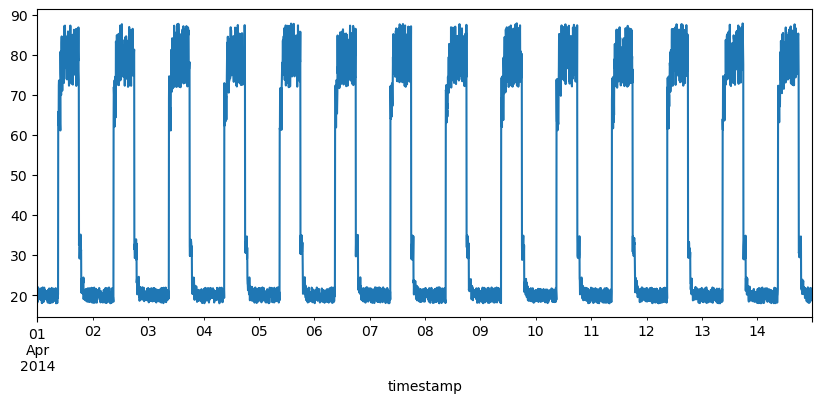

In [14]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);

In [15]:
#
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [16]:
# 
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [17]:
# 
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [18]:
# 
df_daily_jumpsup.iloc[0]['value']

19.761251903

In [19]:
# 
df_daily_jumpsup.shape

(4032, 1)

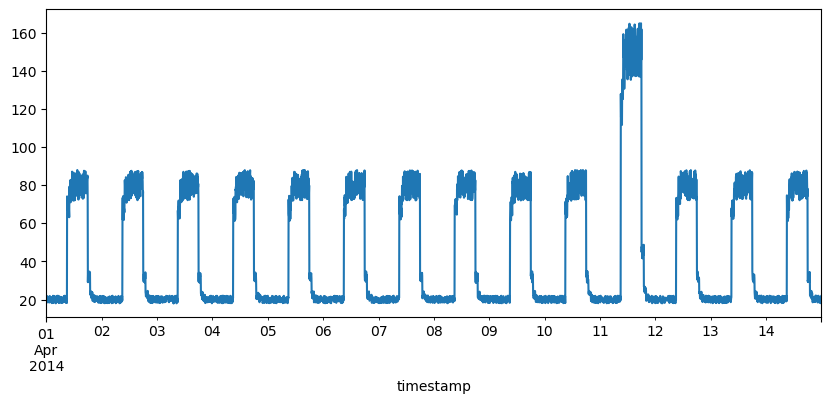

In [20]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

### Prepocessing

In [21]:
# 
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [22]:
# 
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [23]:
# 
df_train_vals = (df_small_noise - train_mean) / train_std

In [24]:
# 
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [25]:
# 
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [26]:
df_small_noise.head()

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173


In [27]:
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()


(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [28]:
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()


(28.077122281262515, 28.077122281262508, 1.0000000000000018)

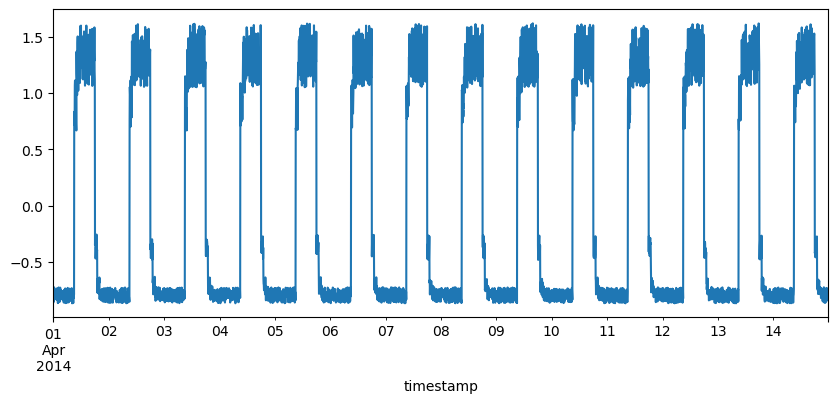

In [29]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

In [30]:
# 
df_train_vals.shape

(4032, 1)

In [31]:
# 
window_size = 288

In [32]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

12

In [33]:
# Number of windows from L.
len(L) - (win_size - 1)

10

In [34]:
# Remove brackets.
len(L) - win_size + 1

10

In [35]:
# Print the windows.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [36]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [37]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [38]:
# 
def windows(vals, N=window_size):
  # 
  L = []
  # 
  for i in range(len(vals) - N + 1):
    # 
    L.append(vals[i:i+N])
  # Stack
  return np.stack(L)

In [39]:
# 
x_train = windows(df_train_vals)

In [40]:
# 
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [41]:
# 
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [42]:
# 
x_train.shape

(3745, 288, 1)

In [43]:
#
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [44]:
# 
x_train[0].flatten();

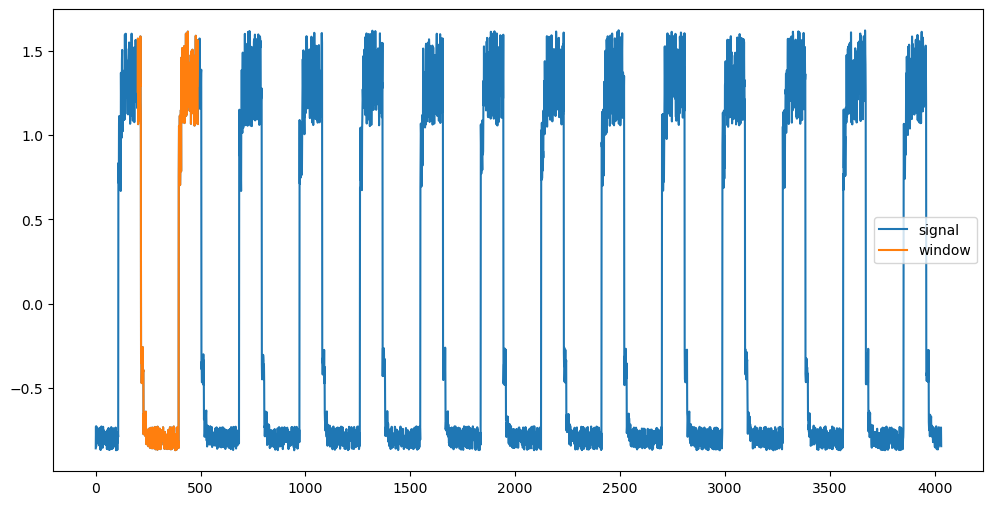

In [45]:
# 
window_no = 200

# 
fig, ax = plt.subplots(figsize=(12, 6))

# 
y = df_train_vals['value'].values

# 
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window.
w = x_train[window_no].flatten()

# 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();

### Neural Network
___

In [46]:
x_train.shape

(3745, 288, 1)

In [47]:
#
layers = [
  #
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [48]:
#
model = keras.Sequential(layers)

In [49]:
# 
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [50]:
# 
model.compile(optimizer=optimizer, loss="mse")

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [52]:
# 
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 56ms/step - loss: 0.4244 - val_loss: 0.0658
Epoch 2/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0734 - val_loss: 0.0418
Epoch 3/50
27/27 [==============================] - 1s 38ms/step - loss: 0.0580 - val_loss: 0.0381
Epoch 4/50
27/27 [==============================] - 1s 42ms/step - loss: 0.0504 - val_loss: 0.0321
Epoch 5/50
27/27 [==============================] - 1s 41ms/step - loss: 0.0438 - val_loss: 0.0295
Epoch 6/50
27/27 [==============================] - 1s 40ms/step - loss: 0.0387 - val_loss: 0.0264
Epoch 7/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0349 - val_loss: 0.0258
Epoch 8/50
27/27 [==============================] - 1s 42ms/step - loss: 0.0319 - val_loss: 0.0250
Epoch 9/50
27/27 [==============================] - 1s 38ms/step - loss: 0.0293 - val_loss: 0.0237
Epoch 10/50
27/27 [==============================] - 1s 40ms/step - loss: 0.0275 - val_loss: 0.0233
Epoch 11/

### Evaluation
___

In [53]:
history.history["loss"]

[0.42438966035842896,
 0.07335378229618073,
 0.05799563229084015,
 0.050425298511981964,
 0.043829940259456635,
 0.038727182894945145,
 0.03491133823990822,
 0.03185040503740311,
 0.029293734580278397,
 0.027481867000460625,
 0.02593635767698288,
 0.024538645520806313,
 0.02351640909910202,
 0.022520648315548897,
 0.021639643236994743]

In [54]:
history.history["val_loss"]

[0.0658017247915268,
 0.04175589606165886,
 0.03813215717673302,
 0.03212334215641022,
 0.029543889686465263,
 0.02640828676521778,
 0.025777028873562813,
 0.024954497814178467,
 0.02370380237698555,
 0.023290716111660004,
 0.02368733286857605,
 0.023769322782754898,
 0.02348259463906288,
 0.024051666259765625,
 0.02460881881415844]

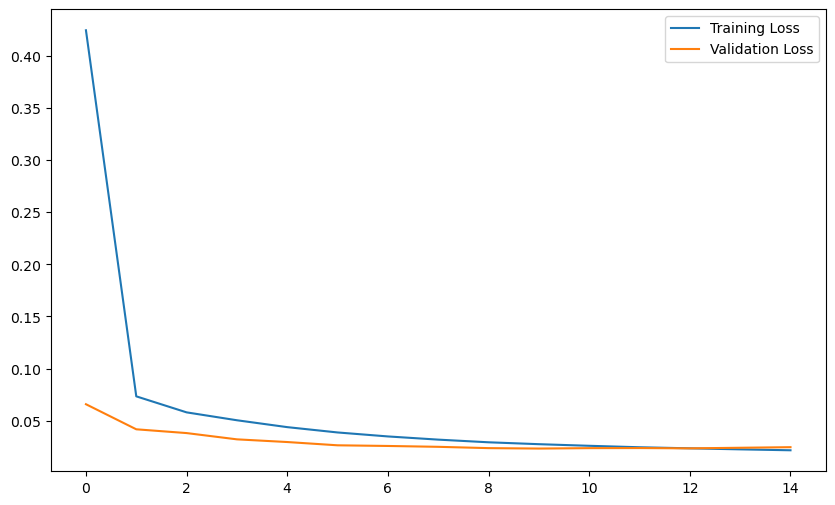

In [55]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

In [56]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 5ms/step


In [57]:
# Calculate loss...
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

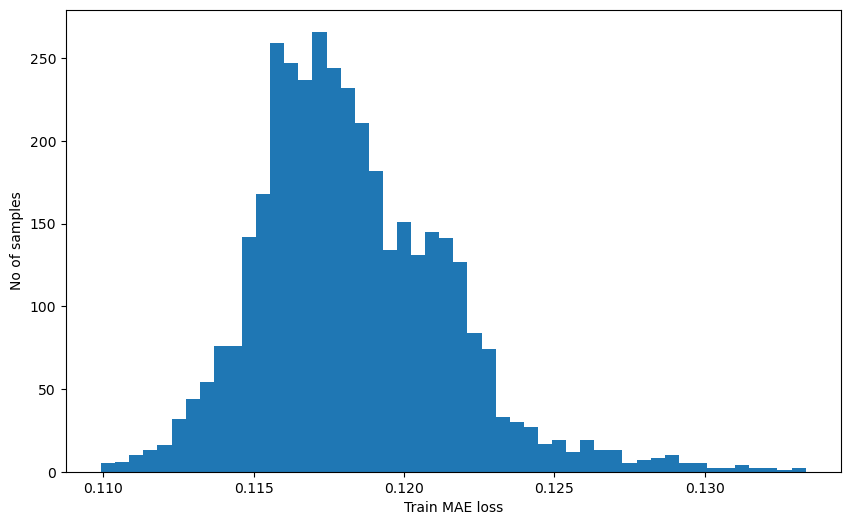

In [58]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");

In [59]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# 
threshold

0.13335474904176506

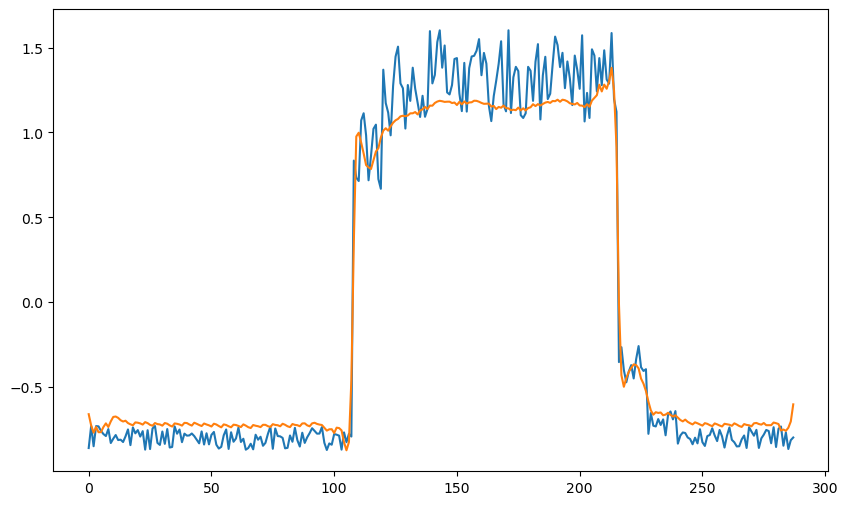

In [60]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

In [61]:
# 
df_test_value = (df_daily_jumpsup - train_mean) / train_std

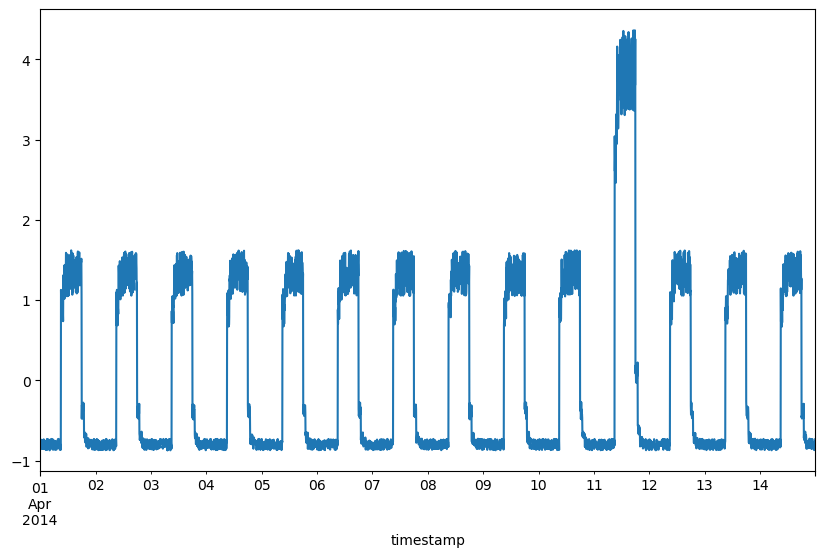

In [62]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [63]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

(3745, 288, 1)

In [64]:
# 
x_test_pred = model.predict(x_test)

118/118 [==============================] - 1s 5ms/step


In [65]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

array([[0.11658367],
       [0.11823683],
       [0.11750654],
       ...,
       [0.11684885],
       [0.11693998],
       [0.1166851 ]])

In [66]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

array([0.11658367, 0.11823683, 0.11750654, ..., 0.11684885, 0.11693998,
       0.1166851 ])

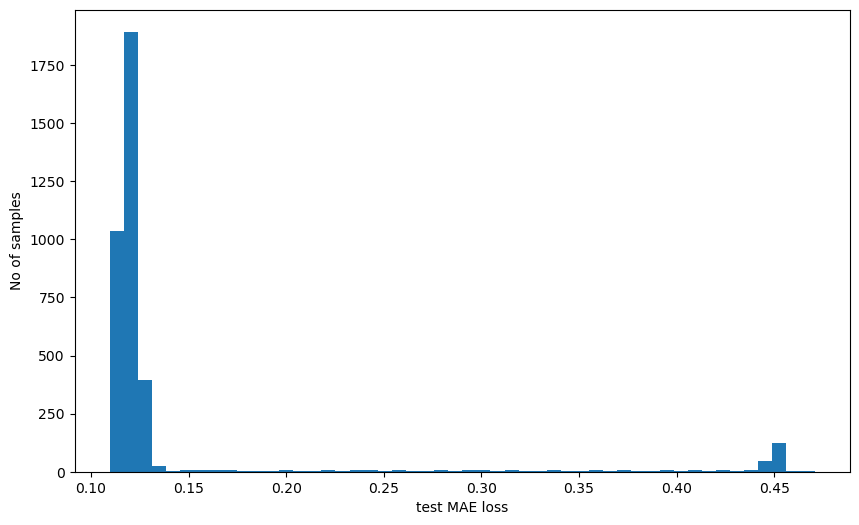

In [67]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

In [68]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

404

In [69]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [70]:
# 
df_subset = df_daily_jumpsup.iloc[inds]

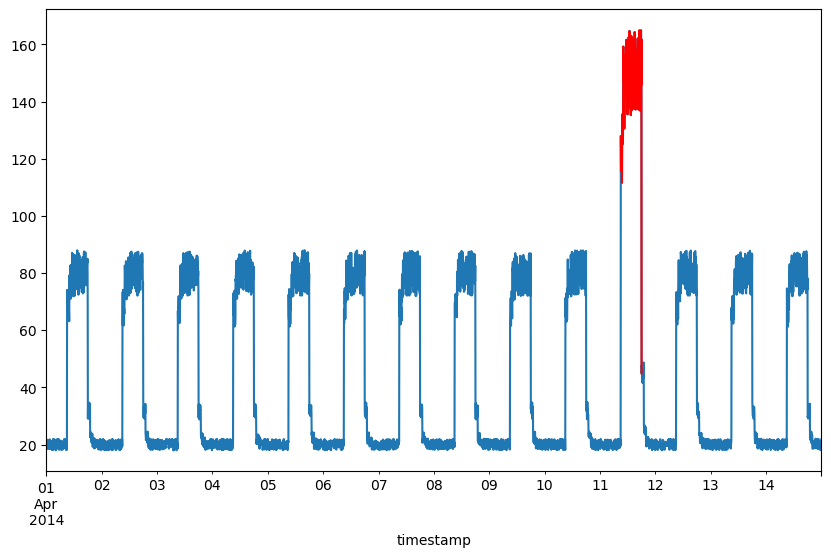

In [71]:
#
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");

___

## The End.